In [1]:
import pandas as pd
import numpy as np

In [2]:
subset_data1 = pd.read_csv('subset_1.csv',chunksize = 1000000)
for data in subset_data1:
    print(data.info())
    break

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0.2            1000000 non-null  int64  
 1   Unnamed: 0.1            1000000 non-null  int64  
 2   Unnamed: 0              1000000 non-null  int64  
 3   Unnamed: 0_x            1000000 non-null  int64  
 4   day                     1000000 non-null  int64  
 5   order_id                1000000 non-null  int64  
 6   item_det_info           1000000 non-null  object 
 7   pay_timestamp           1000000 non-null  object 
 8   buyer_id                1000000 non-null  int64  
 9   promise_speed           235397 non-null   float64
 10  if_cainiao              1000000 non-null  int64  
 11  merchant_id             1000000 non-null  int64  
 12  Logistics_review_score  353537 non-null   float64
 13  Unnamed: 0_y            1000000 non-null  int64  
 14  ord

In [3]:
data_sub1 = data.drop(data.columns[[0, 1, 2, 3, 13]], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0.2            1000000 non-null  int64  
 1   Unnamed: 0.1            1000000 non-null  int64  
 2   Unnamed: 0              1000000 non-null  int64  
 3   Unnamed: 0_x            1000000 non-null  int64  
 4   day                     1000000 non-null  int64  
 5   order_id                1000000 non-null  int64  
 6   item_det_info           1000000 non-null  object 
 7   pay_timestamp           1000000 non-null  object 
 8   buyer_id                1000000 non-null  int64  
 9   promise_speed           235397 non-null   float64
 10  if_cainiao              1000000 non-null  int64  
 11  merchant_id             1000000 non-null  int64  
 12  Logistics_review_score  353537 non-null   float64
 13  Unnamed: 0_y            1000000 non-null  int64  
 14  ord

In [4]:
data_sub1.head()

,day,order_id,item_det_info,pay_timestamp,buyer_id,promise_speed,if_cainiao,merchant_id,Logistics_review_score,order_date,logistic_order_id,action,facility_id,facility_type,city_id,logistic_company_id,timestamp
0,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,NaN,20170103,47522654,SIGNED,26828.0,1.0,234.0,149,2017-01-04 10:28:00
1,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,NaN,20170103,47522654,CONSIGN,NaN,NaN,NaN,149,2017-01-03 20:42:00
2,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,NaN,20170103,47522654,GOT,80222.0,2.0,234.0,149,2017-01-03 22:52:00
3,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,NaN,20170103,47522654,CONSIGN,NaN,NaN,NaN,149,2017-01-03 20:42:00
4,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,NaN,20170103,47522654,TRADE_SUCCESS,NaN,NaN,NaN,149,2017-01-07 16:38:00


In [5]:
import datetime

In [6]:
for index, row in data.iterrows():
    total_minutes = 0
    if row['action'] == 'SIGNED':
        order_time = datetime.datetime.strptime(row['pay_timestamp'], '%Y-%m-%d %H:%M:%S')
        sign_time = datetime.datetime.strptime(row['timestamp'], '%Y-%m-%d %H:%M:%S')
        diff = sign_time - order_time
        total_minutes += diff.total_seconds() / 60
        data.loc[index, 'shipping_time'] = total_minutes

In [7]:
data1 = data
data1['shipping_time'] = data1.groupby('order_id')['shipping_time'].fillna(method='ffill')

In [8]:
data = data1
data['time_difference'] = data['promise_speed']*24*60 - data['shipping_time']

In [9]:
data1=data[['order_id','promise_speed','shipping_time','action','if_cainiao','time_difference','Logistics_review_score']]
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1000000 non-null  int64  
 1   promise_speed           235397 non-null   float64
 2   shipping_time           556321 non-null   float64
 3   action                  1000000 non-null  object 
 4   if_cainiao              1000000 non-null  int64  
 5   time_difference         136313 non-null   float64
 6   Logistics_review_score  353537 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 53.4+ MB


In [10]:
data1['isSatisfied']=[1 if i>=3.5 else 0 for i in data1['Logistics_review_score']]

/var/folders/0r/_568dtlx1ksbtyyp1djps8j80000gn/T/ipykernel_73930/4111824734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['isSatisfied']=[1 if i>=3.5 else 0 for i in data1['Logistics_review_score']]


In [11]:
data1.head()

,order_id,promise_speed,shipping_time,action,if_cainiao,time_difference,Logistics_review_score,isSatisfied
0,23,2.0,928.0,SIGNED,1,1952.0,NaN,0
1,23,2.0,928.0,CONSIGN,1,1952.0,NaN,0
2,23,2.0,928.0,GOT,1,1952.0,NaN,0
3,23,2.0,928.0,CONSIGN,1,1952.0,NaN,0
4,23,2.0,928.0,TRADE_SUCCESS,1,1952.0,NaN,0


<AxesSubplot:>

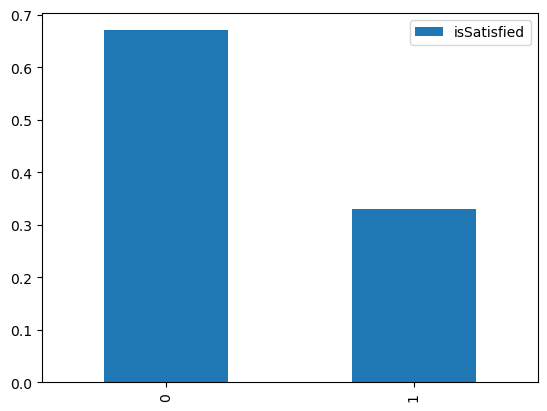

In [12]:
fc = data1['isSatisfied'].value_counts(normalize=True).to_frame()
fc.plot.bar()

In [13]:
data1.fillna(method='ffill')

,order_id,promise_speed,shipping_time,action,if_cainiao,time_difference,Logistics_review_score,isSatisfied
0,23,2.0,928.0,SIGNED,1,1952.0,NaN,0
1,23,2.0,928.0,CONSIGN,1,1952.0,NaN,0
2,23,2.0,928.0,GOT,1,1952.0,NaN,0
3,23,2.0,928.0,CONSIGN,1,1952.0,NaN,0
4,23,2.0,928.0,TRADE_SUCCESS,1,1952.0,NaN,0
...,...,...,...,...,...,...,...,...
999995,840725,0.0,21785.0,DEPARTURE,0,-8881.0,5.0,0
999996,840725,0.0,21785.0,ARRIVAL,0,-8881.0,5.0,0
999997,840725,0.0,21785.0,DEPARTURE,0,-8881.0,5.0,0
999998,840725,0.0,21785.0,DEPARTURE,0,-8881.0,5.0,0


In [14]:
data1 = data1.replace(['', 'nan'], np.nan)
data1 = data1.fillna(0)
data1

,order_id,promise_speed,shipping_time,action,if_cainiao,time_difference,Logistics_review_score,isSatisfied
0,23,2.0,928.0,SIGNED,1,1952.0,0.0,0
1,23,2.0,928.0,CONSIGN,1,1952.0,0.0,0
2,23,2.0,928.0,GOT,1,1952.0,0.0,0
3,23,2.0,928.0,CONSIGN,1,1952.0,0.0,0
4,23,2.0,928.0,TRADE_SUCCESS,1,1952.0,0.0,0
...,...,...,...,...,...,...,...,...
999995,840725,0.0,21785.0,DEPARTURE,0,0.0,0.0,0
999996,840725,0.0,21785.0,ARRIVAL,0,0.0,0.0,0
999997,840725,0.0,21785.0,DEPARTURE,0,0.0,0.0,0
999998,840725,0.0,21785.0,DEPARTURE,0,0.0,0.0,0


In [15]:
data1.head()

,order_id,promise_speed,shipping_time,action,if_cainiao,time_difference,Logistics_review_score,isSatisfied
0,23,2.0,928.0,SIGNED,1,1952.0,0.0,0
1,23,2.0,928.0,CONSIGN,1,1952.0,0.0,0
2,23,2.0,928.0,GOT,1,1952.0,0.0,0
3,23,2.0,928.0,CONSIGN,1,1952.0,0.0,0
4,23,2.0,928.0,TRADE_SUCCESS,1,1952.0,0.0,0


In [16]:
#traintest split
from sklearn.model_selection import train_test_split

y = data1['isSatisfied']
X = data1[['promise_speed','shipping_time','if_cainiao','time_difference']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)
X_train.shape, X_test.shape

((700000, 4), (300000, 4))

**LINEAR DISCRIMINANT ANALYSIS ON IS-SATISFIED**

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [18]:
y_pred_lda = lda.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
lda_confusion = confusion_matrix(y_test, y_pred_lda).ravel()

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_lda)

0.6693733333333334

**logistic regression**

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=88)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=88)

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_prob = logreg.predict_proba(X_test)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[200805     10]
 [ 99178      7]]

Accuracy: 0.6693733333333334


**BOOTSTRAPPING***

In [23]:
#create function for the metric I am using (TPR)
def tpr(predictions):
    cm= confusion_matrix(y_test, predictions)
    tn=cm[0,0]
    fn=cm[1,0]
    fp=cm[0,1]
    tp=cm[1,1]
    return tp/(tp + fn)
def fpr(predictions):
    cm = confusion_matrix(y_test, predictions)
    tn=cm[0,0]
    fn=cm[1,0]
    fp=cm[0,1]
    tp=cm[1,1]
    return fp/(fp + tn)
def acc(predictions):
    cm = confusion_matrix(y_test, predictions)
    tn=cm[0,0]
    fn=cm[1,0]
    fp=cm[0,1]
    tp=cm[1,1]
    return (tp+tn)/(tp+fp+tn+fn)
def pre(predictions):
    cm = confusion_matrix(y_test, predictions)
    tn=cm[0,0]
    fn=cm[1,0]
    fp=cm[0,1]
    tp=cm[1,1]
    return tp/(tp+fp)

In [24]:
import time

def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=50):
    tic = time.time()
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter] = metrics(bs_predicted)
# if bs_iter % 100 == 0:
# print(bs_iter, time.time()-tic)
    output_df = pd.DataFrame(output_array)
    return output_df

In [25]:
#bs_output = bootstrap_validation(X_test,y_test,y_train,logreg, metrics_list=[tpr,fpr,acc],sample = 5000)

In [26]:
print("True positive for Logisitic regression is",tpr(y_pred) )
print("False positive for Logisitic regression is",fpr(y_pred) )
print("Accuracy for Logisitic regression is",acc(y_pred) )
print("PRE for Logisitic regression is",pre(y_pred) )

True positive for Logisitic regression is 7.057518778041034e-05
False positive for Logisitic regression is 4.979707691158529e-05
Accuracy for Logisitic regression is 0.6693733333333334
PRE for Logisitic regression is 0.4117647058823529


In [27]:
print("True positive for LDA is",tpr(y_pred_lda) )
print("False positive for LDA is",fpr(y_pred_lda) )
print("Accuracy for LDA is",acc(y_pred_lda))
print("PRE for LDA is",pre(y_pred_lda))

True positive for LDA is 7.057518778041034e-05
False positive for LDA is 4.979707691158529e-05
Accuracy for LDA is 0.6693733333333334
PRE for LDA is 0.4117647058823529


In [28]:
# Initialize the output array
R2_array = np.zeros([len(n_estimators),len(max_leaf_nodes)])
R2_array[:]=np.nan
RMSE_array = np.zeros([len(n_estimators),len(max_leaf_nodes)])
RMSE_array[:]=np.nan
MAE_array = np.zeros([len(n_estimators),len(max_leaf_nodes)])
MAE_array[:]=np.nan
print(R2_array.shape)

NameError: name 'n_estimators' is not defined

***GRADIENT BOOST CLASSIFIER***

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [30]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)

In [31]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [33]:
y_pred_gbc = gbc.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_prob = gbc.predict_proba(X_test)
y_pred_gbc = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)
cm = confusion_matrix(y_test, y_pred_gbc)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_gbc))

Confusion Matrix: 
 [[200810      5]
 [ 99094     91]]

Accuracy: 0.66967


In [36]:
accuracy = gbc.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.66967


In [34]:
print("True positive for Gradientboostclassifier is",tpr(y_pred) )
print("False positive for Gradientboostclassifier is",fpr(y_pred) )
print("Accuracy for Gradientboostclassifier is",acc(y_pred) )
print("PRE for Gradientboostclassifier is",pre(y_pred) )

True positive for Gradientboostclassifier is 0.0009174774411453344
False positive for Gradientboostclassifier is 2.4898538455792647e-05
Accuracy for Gradientboostclassifier is 0.66967
PRE for Gradientboostclassifier is 0.9479166666666666


***GRADIENT BOOSTING REGRESSOR***

In [ ]:
data.head(5)

In [ ]:
data2=data[['order_id','promise_speed','shipping_time','action','if_cainiao','time_difference','Logistics_review_score']]
data1.info()

In [ ]:
#traintest split
from sklearn.model_selection import train_test_split

y_reg = data2['Logistics_review_score']
X_reg = data2[['promise_speed','shipping_time','if_cainiao','time_difference']]

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X, y, test_size=0.3, random_state=88)
X_reg_train.shape, X_reg_test.shape

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=2000, learning_rate= 0.001, max_leaf_nodes=3,
                                max_depth=10, min_samples_leaf=10, random_state=88, verbose=1) 
gbr.fit(X_reg_train, y_reg_train)

In [ ]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [ ]:
print('OSR2:', round(OSR2(gbr, X_reg_test, y_reg_test, y_reg_train), 5))

**BOOSTING WITH CV**

In [ ]:
#Boosting is not executing with CV due to model complexity

In [ ]:
inventory = pd.read_csv("msom_inventory_data.csv", names = ('day','item_id','warehouse_id','warehouse_city_id','total_begin_qty','total_end_qty','Replen_in_qty','transfer_in_qty','sale_out_qty','transfer_out_qty'))
inventory.info()